In [25]:
pwd

'/Users/uyen/Desktop/DSI/project_3/ipynb'

In [1]:
%run ../__init__.py
%matplotlib inline

# EDA of UCI data

In [2]:
target = pd.read_csv('../Datasets/madelon_train.labels', sep=' ', header=None)
train = pd.read_csv('../Datasets/madelon_train.data', sep=' ', header=None)
val = pd.read_csv('../Datasets/madelon_valid.data', sep=' ', header=None)

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,NaN
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,NaN
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,NaN
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,NaN
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,NaN


In [4]:
target.columns = ['target']
train = train.drop(train.columns[500], axis=1)

train= pd.concat([train, target], 1)

X = train.drop(['target'], axis=1)
y = train['target']

In [5]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,target
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,-1
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,-1
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,-1
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1


In [6]:
X.shape, y.shape

((2000, 500), (2000,))

In [7]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511


In [32]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,481.722500,483.452500,510.166000,483.384500,501.612500,479.259000,480.109500,476.565000,486.793500,478.78900,...,482.458500,478.811500,486.356500,496.565500,493.49950,510.893000,478.219500,483.309000,507.977000,490.266000
std,6.421769,30.186294,38.899165,9.059895,41.389418,6.795956,40.575925,1.384461,15.043836,7.19092,...,20.890033,4.011735,23.967366,127.635442,34.81902,37.459353,5.880613,13.559847,37.224297,25.825273
min,462.000000,381.000000,370.000000,453.000000,371.000000,459.000000,334.000000,471.000000,430.000000,455.00000,...,407.000000,463.000000,391.000000,130.000000,368.00000,398.000000,457.000000,435.000000,363.000000,403.000000
25%,477.000000,464.000000,485.000000,477.000000,475.000000,475.000000,452.750000,476.000000,477.000000,474.00000,...,468.000000,476.000000,471.000000,404.000000,470.00000,486.000000,474.000000,474.000000,482.000000,473.000000
50%,482.000000,483.000000,510.500000,483.000000,500.000000,479.000000,480.000000,477.000000,487.000000,479.00000,...,482.000000,479.000000,486.000000,504.000000,492.00000,511.000000,478.000000,483.000000,508.000000,490.000000
75%,486.000000,503.000000,536.000000,490.000000,528.000000,484.000000,506.250000,477.000000,496.250000,484.00000,...,496.000000,481.000000,502.000000,586.000000,517.00000,535.000000,482.000000,492.000000,533.000000,507.250000
max,503.000000,600.000000,654.000000,519.000000,688.000000,505.000000,611.000000,481.000000,536.000000,503.00000,...,549.000000,497.000000,566.000000,920.000000,615.00000,661.000000,500.000000,535.000000,644.000000,583.000000


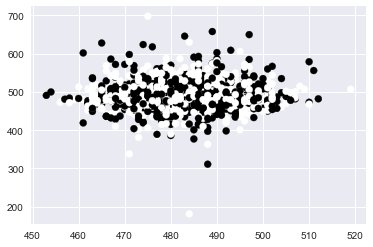

In [35]:
plt.scatter(X[3],X[:4],c=y)

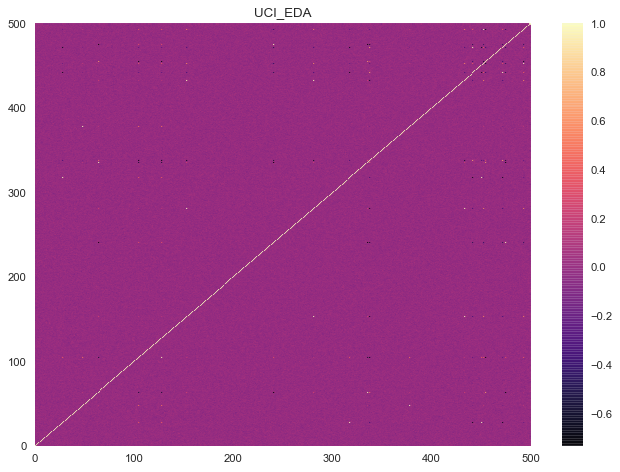

In [57]:
# #correlation matrix
plt.figure(figsize=(10,7), dpi=80)
plt.title('UCI_EDA')
plt.pcolor(np.corrcoef(X, rowvar=False),
           cmap=mpl.cm.magma, 
           alpha=0.8)
plt.colorbar()
plt.savefig('../Images/uci_heatmap.png')
plt.show()

Alot of noise in the data, can't tell much from the heatmap

In [40]:
pca = PCA(2)
X_pc = pca.fit_transform(X)

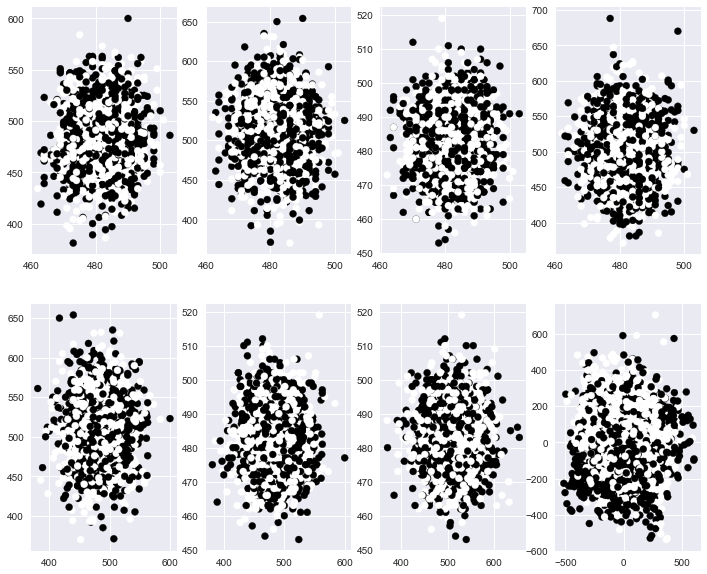

In [42]:
fig = plt.figure(figsize=(12,10))
fig.add_subplot(2,4,1)
plt.scatter(X[0],X[1], c=y)
fig.add_subplot(2,4,2)
plt.scatter(X[0],X[2], c=y)
fig.add_subplot(2,4,3)
plt.scatter(X[0],X[3], c=y)
fig.add_subplot(2,4,4)
plt.scatter(X[0],X[4], c=y)
fig.add_subplot(2,4,5)
plt.scatter(X[1],X[2], c=y)
fig.add_subplot(2,4,6)
plt.scatter(X[1],X[3], c=y)
fig.add_subplot(2,4,7)
plt.scatter(X[2],X[3], c=y)
fig.add_subplot(2,4,8)
plt.scatter(X_pc[:,0],X_pc[:,1], c=y)

# EDA of Database Dataset

In [17]:
database_1 = pd.read_pickle('../Datasets/database_1.p')
database_2 = pd.read_pickle('../Datasets/database_2.p')
database_3 = pd.read_pickle('../Datasets/database_3.p')

In [49]:
database_1.head()

,_id,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999,target
0,68,-1.601151,0.015830,-0.797396,-0.773659,0.794560,-0.723385,2.551907,-1.419732,1.095865,...,1.472390,0.402376,0.205470,0.918775,-1.245515,0.963861,-1.047589,-2.167971,0.376090,1
1,106,-1.180409,1.140129,0.674667,-0.435795,0.443647,0.987556,0.836558,-0.779660,-1.023285,...,0.501399,-0.776944,0.139919,1.341844,0.146152,-1.364414,-0.018121,-0.865222,0.422413,0
2,114,-0.520219,1.103622,-1.036229,-0.716255,-0.060845,0.041324,-0.264753,0.054012,-0.720405,...,1.120850,0.444794,-0.143878,1.131859,-0.590383,0.302393,0.613446,1.117143,1.082976,0
3,120,-0.662163,-0.136778,0.681523,0.881738,0.374278,-1.825832,-0.001869,1.218144,-0.693351,...,1.706526,-2.466427,1.090575,0.174995,-1.001662,-0.677504,-1.647389,0.549608,0.307143,1
4,150,1.459898,-0.097152,0.978776,-1.726592,0.587427,1.632678,-0.871186,-0.043300,1.247033,...,0.743840,-0.977050,0.003572,1.063721,1.255826,-0.531827,1.221130,1.282362,-0.440198,0


In [48]:
database_1.describe()

,_id,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999,target
count,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,...,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000
mean,99851.713961,-0.000644,0.011238,-0.007027,0.006228,-0.009641,0.000069,0.013951,-0.003103,-0.004914,...,0.011455,0.000559,-0.001135,-0.002511,-0.001020,-0.008105,-0.005840,-0.020141,0.003878,0.504845
std,57858.890301,1.002367,1.007393,1.013438,0.992726,1.013249,0.996877,1.001488,0.999505,0.996883,...,0.997956,0.996477,0.976924,1.005966,0.997263,0.983191,1.009694,0.999278,0.996938,0.500001
min,68.000000,-3.970869,-3.713245,-3.799994,-4.064322,-3.719655,-4.160768,-3.865140,-4.195778,-3.561709,...,-3.663512,-3.684850,-3.522222,-3.876919,-3.938871,-3.860241,-4.157050,-4.324730,-4.304072,0.000000
25%,49392.750000,-0.673479,-0.669006,-0.694533,-0.661398,-0.700593,-0.675164,-0.660738,-0.669123,-0.673748,...,-0.661988,-0.671813,-0.655625,-0.672065,-0.679845,-0.683340,-0.682185,-0.702332,-0.671434,0.000000
50%,99575.500000,0.000278,0.015001,-0.003781,-0.002423,-0.006867,-0.005258,0.010363,0.002611,-0.002421,...,0.019738,0.002550,-0.000847,-0.003179,0.012594,-0.007016,0.004916,-0.023932,0.021663,1.000000
75%,149934.500000,0.662902,0.692173,0.679256,0.657913,0.660438,0.676891,0.687082,0.672583,0.678048,...,0.692126,0.678716,0.667803,0.679341,0.664377,0.668147,0.672805,0.660151,0.678353,1.000000
max,199979.000000,4.141007,3.813651,4.394643,3.564476,3.899662,4.021667,3.457238,3.942096,3.796742,...,3.789896,3.606885,3.536370,4.004201,4.509761,3.348567,3.549349,3.763220,3.732850,1.000000


In [40]:
# database_1.isnull().sum().sort_values(ascending=False)

In [41]:
# database_2.isnull().sum().sort_values(ascending=False)

In [42]:
# database_3.isnull().sum().sort_values(ascending=False)

There are no null values in the datasets. 

In [55]:
sample = database_1.sample(200)

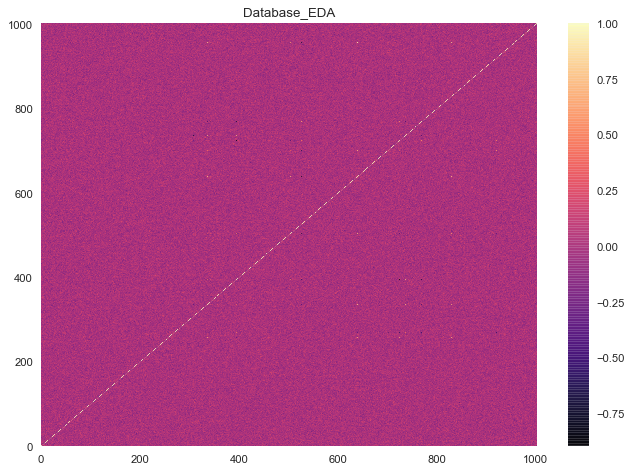

In [56]:
plt.figure(figsize=(10,7), dpi=80)
plt.title('Database_EDA')
plt.pcolor(np.corrcoef(sample, rowvar=False),
           cmap=mpl.cm.magma, 
           alpha=0.8)
plt.colorbar()
plt.savefig('../Images/db_heatmap.png')
plt.show()